<a href="https://colab.research.google.com/github/ol-s-cloud/heavy-oil-rheology-ml/blob/main/Heavy_Oil_Tables_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Table 4.1: Physical Properties
   Density (g/cm³)  Temperature (°F)  Dynamic Viscosity (cP)  \
0             0.95                60                  7.7672   
1             0.95               977                  2.0140   

   Kinematic Viscosity (cSt)  
0                      8.176  
1                      2.120  

Data Table 4.2.1: Shear Stress for Natural Bitumen
    Shear Stress (mPa)  Shear Rate (s⁻¹)  Apparent Viscosity (Pa)  \
0                  0.0                 0                   0.0000   
1                225.0                40                   5.6250   
2                325.0                45                   7.2220   
3                350.0                50                   7.0000   
4                360.0                60                   6.0000   
5                455.0                70                   6.5000   
6                375.0                80                   4.6875   
7                433.5                90                   4.8167   
8    

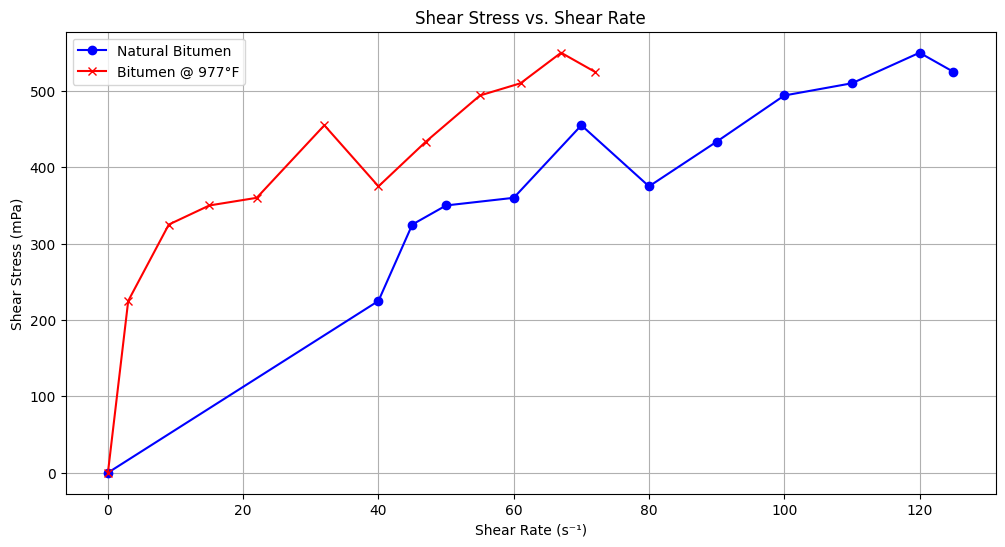

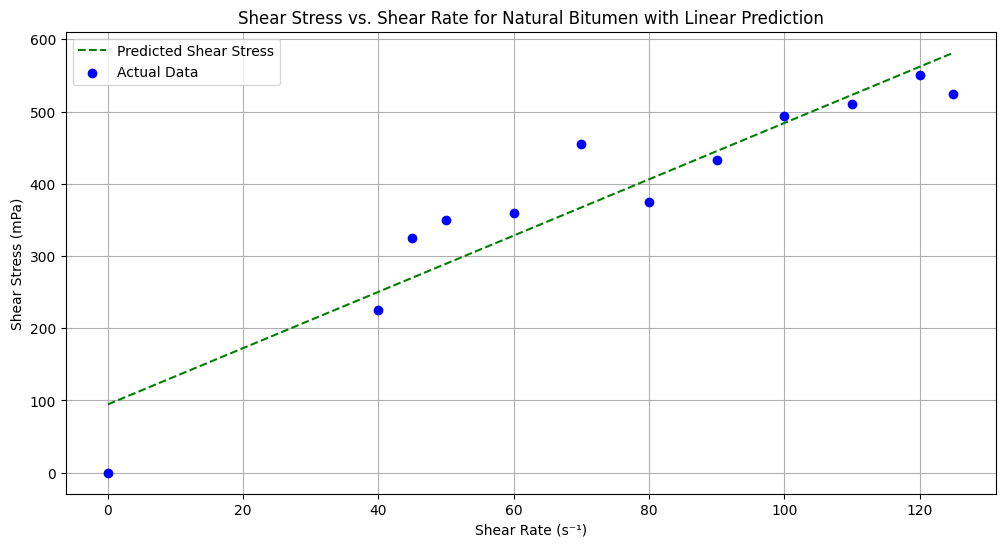

Model Performance Metrics:
R² Score: 0.6258
RMSE: 6.8926
MAE: 4.0170


NameError: name 'shap_analysis' is not defined

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import shap

# Load the datasets (Table 4.1, Table 4.2.1, and Table 4.2.2)
data_4_1 = pd.DataFrame({
    "Density (g/cm³)": [0.95, 0.95],
    "Temperature (°F)": [60, 977],
    "Dynamic Viscosity (cP)": [7.7672, 2.014],
    "Kinematic Viscosity (cSt)": [8.176, 2.120]
})

data_4_2_1 = pd.DataFrame({
    "Shear Stress (mPa)": [0, 225, 325, 350, 360, 455, 375, 433.5, 494, 510, 550, 525],
    "Shear Rate (s⁻¹)": [0, 40, 45, 50, 60, 70, 80, 90, 100, 110, 120, 125],
    "Apparent Viscosity (Pa)": [0, 5.625, 7.222, 7.0, 6.0, 6.5, 4.6875, 4.8167, 4.940, 4.6364, 4.5833, 4.2000],
    "Plastic Viscosity (Pa)": [3.894]*12,
    "Yield Point (lbf/100ft²)": [0, 69.24, 149.77, 155.3, 126.36, 182.42, 63.48, 83.04, 104.6, 81.66, 82.72, 38.25]
})

data_4_2_2 = pd.DataFrame({
    "Shear Stress (mPa)": [0, 225, 325, 350, 360, 455, 375, 433.5, 494, 510, 550, 525],
    "Shear Rate (s⁻¹)": [0, 3, 9, 15, 22, 32, 40, 47, 55, 61, 67, 72],
    "Apparent Viscosity (Pa)": [0, 75.0, 36, 32, 16, 14, 9.375, 9.2234, 8.98182, 8.36066, 8.20896, 7.39437],
    "Plastic Viscosity (Pa)": [0.1433]*12,
    "Yield Point (lbf/100ft²)": [0, 224.57, 323.71, 347.85, 356.85, 450.41, 369.27, 426.76, 486.12, 501.26, 540.40, 514.68]
})

# Combine all datasets for analysis
combined_df = pd.concat([
    data_4_1.rename(columns={"Dynamic Viscosity (cP)": "Viscosity", "Temperature (°F)": "Temperature"}),
    data_4_2_1.rename(columns={"Apparent Viscosity (Pa)": "Viscosity", "Shear Rate (s⁻¹)": "Temperature"}),
    data_4_2_2.rename(columns={"Apparent Viscosity (Pa)": "Viscosity", "Shear Rate (s⁻¹)": "Temperature"})
], ignore_index=True)

# Display data tables
def show_data_tables():
    print("Data Table 4.1: Physical Properties")
    print(data_4_1)
    print("\nData Table 4.2.1: Shear Stress for Natural Bitumen")
    print(data_4_2_1)
    print("\nData Table 4.2.2: Shear Stress for Bitumen @ 977°F")
    print(data_4_2_2)

# Plot Shear Stress vs Shear Rate for Natural Bitumen and Bitumen @ 977°F
def plot_shear_stress_rate(df_4_2_1, df_4_2_2):
    plt.figure(figsize=(12, 6))

    # Plot for Natural Bitumen (Table 4.2.1)
    plt.plot(df_4_2_1["Shear Rate (s⁻¹)"], df_4_2_1["Shear Stress (mPa)"], marker='o', label="Natural Bitumen", color='b')

    # Plot for Bitumen at 977°F (Table 4.2.2)
    plt.plot(df_4_2_2["Shear Rate (s⁻¹)"], df_4_2_2["Shear Stress (mPa)"], marker='x', label="Bitumen @ 977°F", color='r')

    plt.xlabel("Shear Rate (s⁻¹)")
    plt.ylabel("Shear Stress (mPa)")
    plt.title("Shear Stress vs. Shear Rate")
    plt.legend()
    plt.grid(True)
    plt.show()

# Linear model to predict shear stress for Natural Bitumen (from Table 4.2.1)
def shear_stress_prediction(df_4_2_1):
    # Define the features and target
    X = df_4_2_1[["Shear Rate (s⁻¹)"]]
    y = df_4_2_1["Shear Stress (mPa)"]

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict shear stress values (y) for the shear rate values
    y_pred = model.predict(X)

    # Plot shear stress predictions
    plt.figure(figsize=(12, 6))
    plt.plot(df_4_2_1["Shear Rate (s⁻¹)"], y_pred, label="Predicted Shear Stress", color='g', linestyle='--')
    plt.scatter(df_4_2_1["Shear Rate (s⁻¹)"], df_4_2_1["Shear Stress (mPa)"], color='b', label="Actual Data", zorder=5)
    plt.xlabel("Shear Rate (s⁻¹)")
    plt.ylabel("Shear Stress (mPa)")
    plt.title("Shear Stress vs. Shear Rate for Natural Bitumen with Linear Prediction")
    plt.legend()
    plt.grid(True)
    plt.show()

# Train ML models on the combined dataset
def train_models(data):
    X = data[["Temperature"]]
    y = data["Viscosity"]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the pipeline
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ("model", LinearRegression())
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict
    y_pred = pipeline.predict(X_test)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print("Model Performance Metrics:")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")

    return pipeline, X_test, y_test, y_pred

# Function for SHAP analysis with raw data (and transformed feature names)
def shap_analysis_with_feature_names(pipeline, X_test):
    model = pipeline.named_steps["model"]
    scaler = pipeline.named_steps["scaler"]
    poly = pipeline.named_steps["poly"]

    # Use the raw test data for SHAP
    X_test_raw = X_test  # This is the raw, untransformed data

    # Transform the raw test data using the same steps as the pipeline
    X_test_scaled = scaler.transform(X_test_raw)
    X_test_poly = poly.transform(X_test_scaled)

    # Get transformed feature names
    poly_feature_names = poly.get_feature_names_out(input_features=X_test.columns.tolist())

    # SHAP explainer
    explainer = shap.Explainer(model, X_test_poly)
    shap_values = explainer(X_test_poly)

    # SHAP Summary plot (shows the feature importance for raw features)
    shap.summary_plot(shap_values, X_test_poly, feature_names=poly_feature_names)
    shap.plots.bar(shap_values)  # This shows the importance of each feature


# Perform analysis
if __name__ == "__main__":
    show_data_tables()
    plot_shear_stress_rate(data_4_2_1, data_4_2_2)
    shear_stress_prediction(data_4_2_1)
    pipeline, X_test, y_test, y_pred = train_models(combined_df)
    shap_analysis(pipeline, X_test)

    # Get feature names after polynomial transformation
poly_feature_names = pipeline.named_steps['poly'].get_feature_names_out(input_features=X_test.columns.tolist())

# Display the feature names
print(poly_feature_names)